Testing phase diagram of test_critical_pair and train_critical_pair

n = 9
p = 6
q = 4

test_critical_pair = [q, p+1]
train_critical_pair = [q, q+1]

issue! with the train pairs.  

test:
break, c_var_val = 0.0001, k_o = 0.4
train:
break, c_var_val = 1.7601, k_o = 0.4
test:
break, c_var_val = 0.0001, k_o = 0.401
train:
break, c_var_val = 1.7201, k_o = 0.401
test:
break, c_var_val = 0.0001, k_o = 0.402
train:
break, c_var_val = 1.6801, k_o = 0.402
test:
break, c_var_val = 0.0001, k_o = 0.403
train:
break, c_var_val = 1.6401000000000001, k_o = 0.403
test:
break, c_var_val = 0.0001, k_o = 0.404
train:
break, c_var_val = 1.6001, k_o = 0.404
test:
break, c_var_val = 0.0001, k_o = 0.405
train:
break, c_var_val = 1.5601, k_o = 0.405
test:
break, c_var_val = 0.0001, k_o = 0.406
train:
break, c_var_val = 1.5201, k_o = 0.406
test:
break, c_var_val = 0.0001, k_o = 0.40700000000000003
train:
break, c_var_val = 1.4901, k_o = 0.40700000000000003
test:
break, c_var_val = 0.0001, k_o = 0.40800000000000003
train:
break, c_var_val = 1.4501, k_o = 0.40800000000000003
test:
break, c_var_val = 0.0001, k_o = 0.40900000000000003
train:
break, c_var_val = 1.4201, k_o = 0.4090000000000000

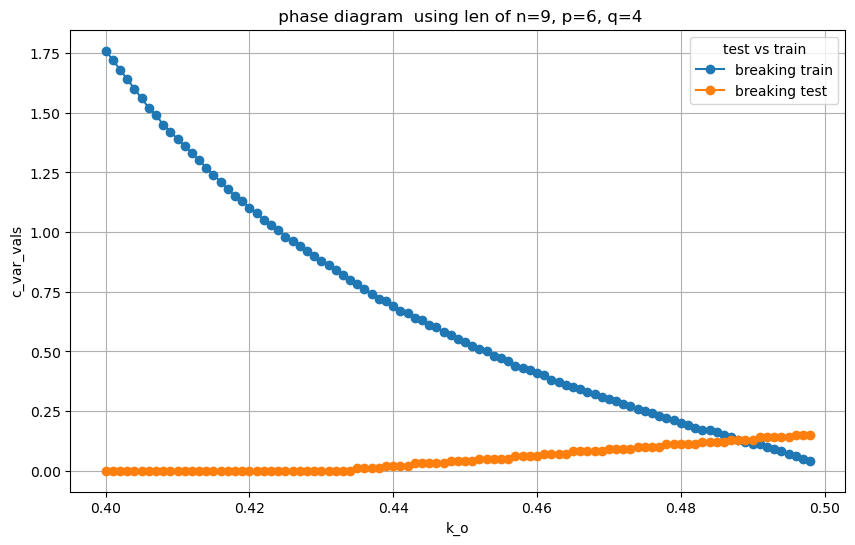

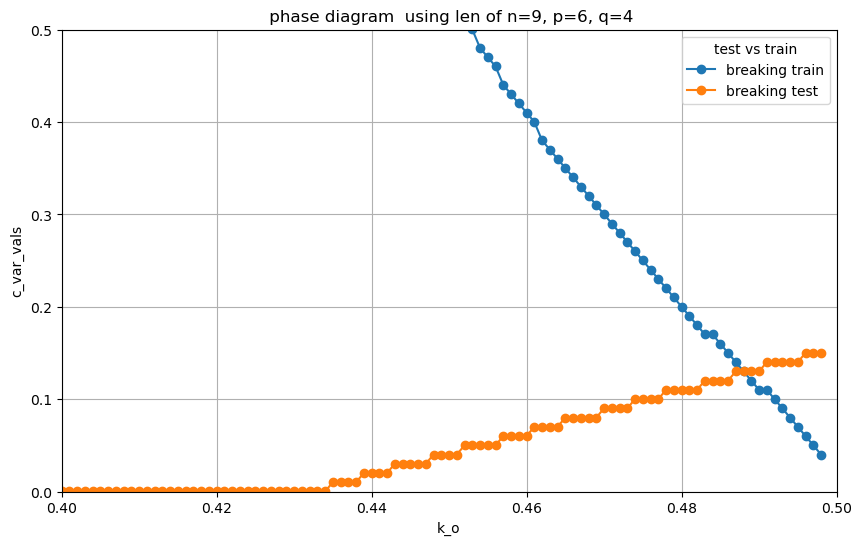

In [2]:
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math

# Set initial parameters
n = 9  # fix n
p = 6
q = 4
k_o_vals = np.arange(.4, 0.499, 0.001)
k_s = 1
k_d = 0
delta_s = k_s - k_d 
excep_len = 3 
c_var_vals = np.arange(1e-4, 10, 0.01)
c_vals = 1/(c_var_vals * delta_s)

test_critical_pair = [q-1, p]
train_critical_pair = [q, q+1]

margin_list_array = []

breaking_reg_test = []
breaking_reg_train = []
for k_o in k_o_vals:
    
    test_flag = False
    for i in range(len(c_vals)):
        sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_vals[i])
        ranks = sim.calc_rank_analytic()
        margin_test = sim.f_j_k(test_critical_pair[0],test_critical_pair[1])
        if margin_test<0:
            breaking_reg_test.append(c_var_vals[i])
            print('test:')
            # print(f'for k_o = {k_o}, i = {i}, c_var_val = {c_var_vals[i]}')
            print(f'break, c_var_val = {c_var_vals[i]}, k_o = {k_o}')
            test_flag = True
            break
    if test_flag == False:
        breaking_reg_test.append(0)

    train_flag = False
    for i in range(len(c_vals)):
        sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_vals[i])
        ranks = sim.calc_rank_analytic()
        margin_train = sim.f_j_k(train_critical_pair[0],train_critical_pair[1])
        # print(margin_train)
        if margin_train<0:
            breaking_reg_train.append(c_var_vals[i])
            print('train:')
            # print(f'for k_o = {k_o}, i = {i}, c_var_val = {c_var_vals[i]}')
            print(f'break, c_var_val = {c_var_vals[i]}, k_o = {k_o}')
            train_flag = True
            break

    if train_flag == False:
        breaking_reg_train.append(0)


# Plot results

plt.figure(figsize=(10, 6))
plt.title(f' phase diagram  using len of n={n}, p={p}, q={q}')
plt.plot(k_o_vals, breaking_reg_train, marker='o', label=f'breaking train')
plt.plot(k_o_vals, breaking_reg_test, marker='o', label=f'breaking test')
plt.legend(title="test vs train")
plt.xlabel('k_o')
plt.ylabel('c_var_vals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.title(f' phase diagram  using len of n={n}, p={p}, q={q}')
plt.plot(k_o_vals, breaking_reg_train, marker='o', label=f'breaking train')
plt.plot(k_o_vals, breaking_reg_test, marker='o', label=f'breaking test')
plt.legend(title="test vs train")
plt.xlabel('k_o')
plt.ylabel('c_var_vals')
plt.grid(True)
plt.ylim(0, 0.5)
plt.xlim(0.40,0.5)
plt.show()


In [36]:
print(breaking_reg_test)
print(breaking_reg_train)

[0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.040100000000000004, 0.0901, 0.1301]
[4.0601, 2.2601000000000004, 1.3901000000000001, 0.8801, 0.5401, 0.3001, 0.1101]


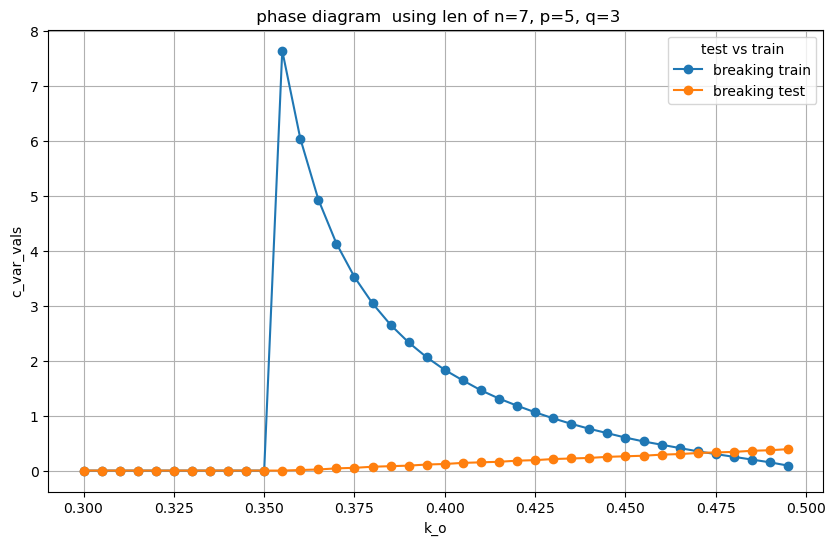

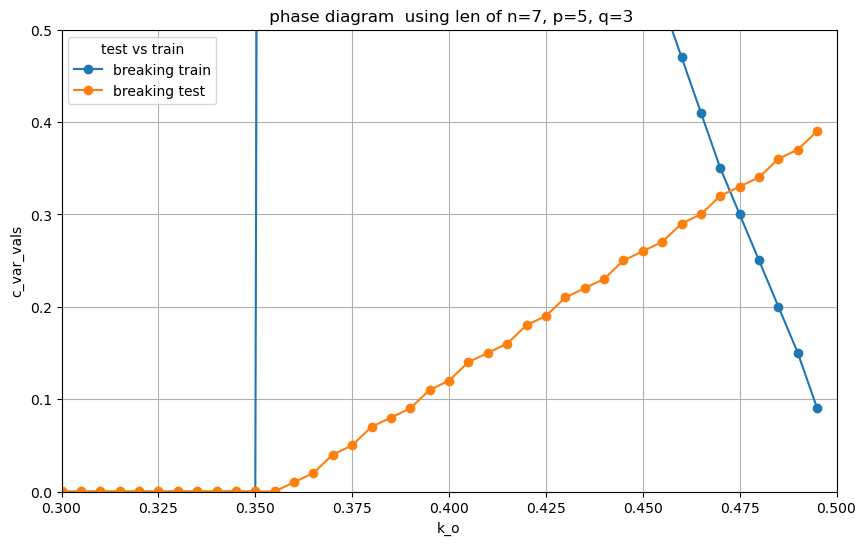

In [8]:
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math

# Set initial parameters
n = 7  # fix n
p = 5
q = 3
k_o_vals = np.arange(.3, 0.499, 0.005)
k_s = 1
k_d = 0
delta_s = k_s - k_d 
excep_len = 3 
c_var_vals = np.arange(1e-4, 10, 0.01)
c_vals = 1/(c_var_vals * delta_s)

test_critical_pair = [q-1, p]
train_critical_pair = [q, q+1]

margin_list_array = []

breaking_reg_test = []
breaking_reg_train = []
for k_o in k_o_vals:
    
    test_flag = False
    for i in range(len(c_vals)):
        sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_vals[i])
        ranks = sim.calc_rank_analytic()
        margin_test = sim.f_j_k(test_critical_pair[0],test_critical_pair[1])
        if margin_test<0:
            breaking_reg_test.append(c_var_vals[i])
            # print('test:')
            # print(f'for k_o = {k_o}, i = {i}, c_var_val = {c_var_vals[i]}')
            # print(f'break, c_var_val = {c_var_vals[i]}, k_o = {k_o}')
            test_flag = True
            break
    if test_flag == False:
        breaking_reg_test.append(0)

    train_flag = False
    for i in range(len(c_vals)):
        sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_vals[i])
        ranks = sim.calc_rank_analytic()
        margin_train = sim.f_j_k(train_critical_pair[0],train_critical_pair[1])
        # print(margin_train)
        if margin_train<0:
            breaking_reg_train.append(c_var_vals[i])
            # print('train:')
            # print(f'for k_o = {k_o}, i = {i}, c_var_val = {c_var_vals[i]}')
            # print(f'break, c_var_val = {c_var_vals[i]}, k_o = {k_o}')
            train_flag = True
            break

    if train_flag == False:
        breaking_reg_train.append(0)


# Plot results

plt.figure(figsize=(10, 6))
plt.title(f' phase diagram  using len of n={n}, p={p}, q={q}')
plt.plot(k_o_vals, breaking_reg_train, marker='o', label=f'breaking train')
plt.plot(k_o_vals, breaking_reg_test, marker='o', label=f'breaking test')
plt.legend(title="test vs train")
plt.xlabel('k_o')
plt.ylabel('c_var_vals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.title(f' phase diagram  using len of n={n}, p={p}, q={q}')
plt.plot(k_o_vals, breaking_reg_train, marker='o', label=f'breaking train')
plt.plot(k_o_vals, breaking_reg_test, marker='o', label=f'breaking test')
plt.legend(title="test vs train")
plt.xlabel('k_o')
plt.ylabel('c_var_vals')
plt.grid(True)
plt.ylim(0, 0.5)
plt.xlim(0.30,0.5)
plt.show()


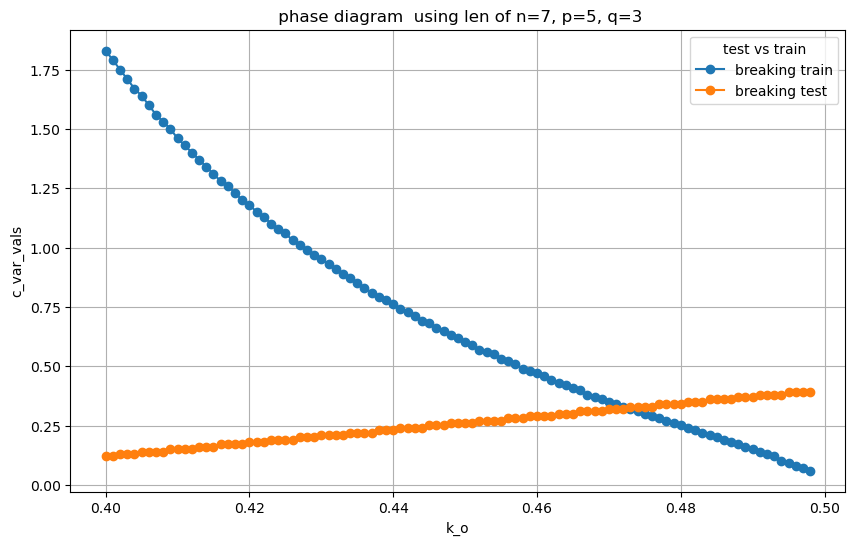

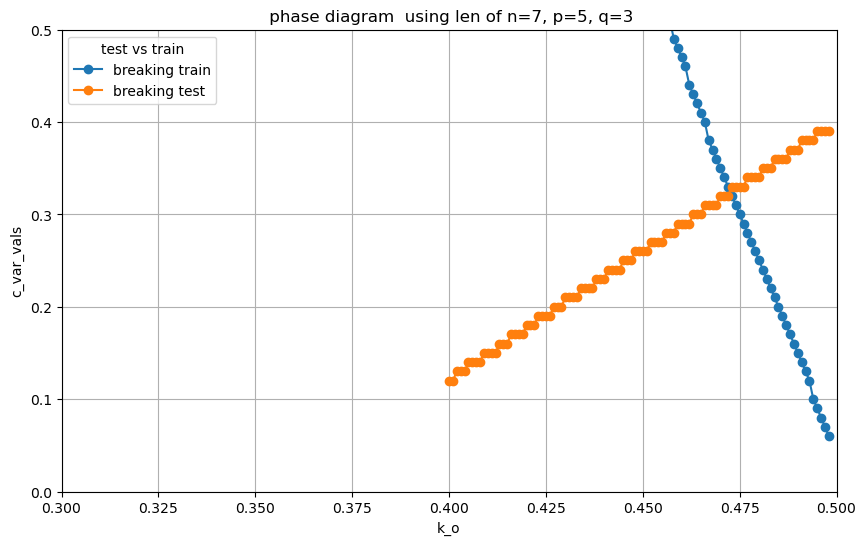

In [4]:
plt.figure(figsize=(10, 6))
plt.title(f' phase diagram  using len of n={n}, p={p}, q={q}')
plt.plot(k_o_vals, breaking_reg_train, marker='o', label=f'breaking train')
plt.plot(k_o_vals, breaking_reg_test, marker='o', label=f'breaking test')
plt.legend(title="test vs train")
plt.xlabel('k_o')
plt.ylabel('c_var_vals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.title(f' phase diagram  using len of n={n}, p={p}, q={q}')
plt.plot(k_o_vals, breaking_reg_train, marker='o', label=f'breaking train')
plt.plot(k_o_vals, breaking_reg_test, marker='o', label=f'breaking test')
plt.legend(title="test vs train")
plt.xlabel('k_o')
plt.ylabel('c_var_vals')
plt.grid(True)
plt.ylim(0, 0.5)
plt.xlim(0.30,0.5)
plt.show()

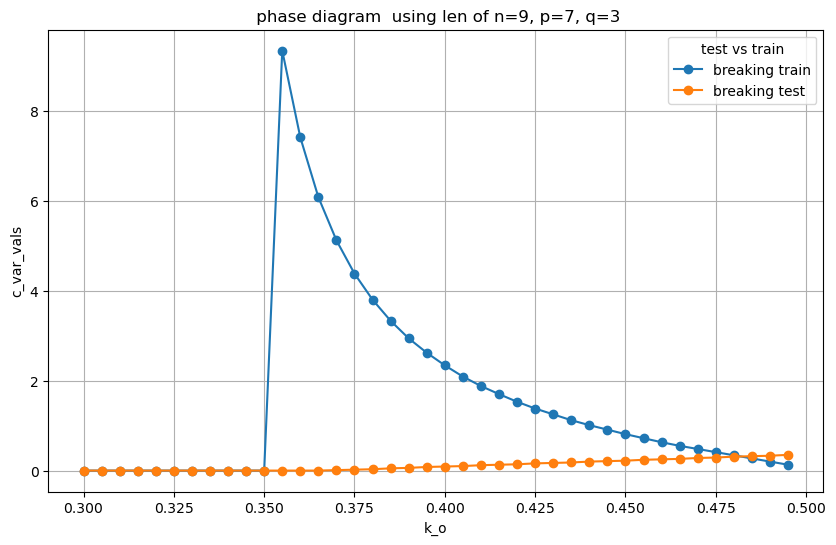

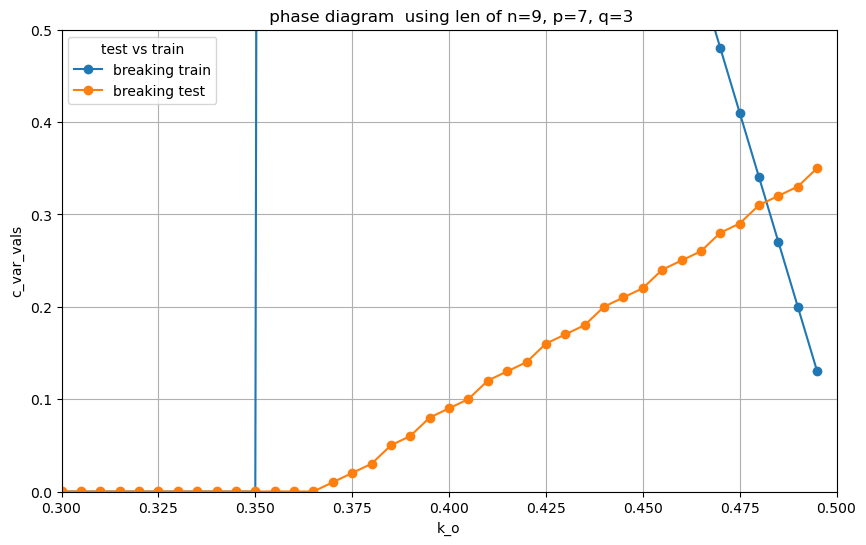

In [9]:
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math

# Set initial parameters
n = 9  # fix n
p = 7
q = 3
k_o_vals = np.arange(.3, 0.499, 0.005)
k_s = 1
k_d = 0
delta_s = k_s - k_d 
excep_len = 3 
c_var_vals = np.arange(1e-4, 10, 0.01)
c_vals = 1/(c_var_vals * delta_s)

test_critical_pair = [q-1, p]
train_critical_pair = [q, q+1]

margin_list_array = []

breaking_reg_test = []
breaking_reg_train = []
for k_o in k_o_vals:
    
    test_flag = False
    for i in range(len(c_vals)):
        sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_vals[i])
        ranks = sim.calc_rank_analytic()
        margin_test = sim.f_j_k(test_critical_pair[0],test_critical_pair[1])
        if margin_test<0:
            breaking_reg_test.append(c_var_vals[i])
            # print('test:')
            # print(f'for k_o = {k_o}, i = {i}, c_var_val = {c_var_vals[i]}')
            # print(f'break, c_var_val = {c_var_vals[i]}, k_o = {k_o}')
            test_flag = True
            break
    if test_flag == False:
        breaking_reg_test.append(0)

    train_flag = False
    for i in range(len(c_vals)):
        sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_vals[i])
        ranks = sim.calc_rank_analytic()
        margin_train = sim.f_j_k(train_critical_pair[0],train_critical_pair[1])
        # print(margin_train)
        if margin_train<0:
            breaking_reg_train.append(c_var_vals[i])
            # print('train:')
            # print(f'for k_o = {k_o}, i = {i}, c_var_val = {c_var_vals[i]}')
            # print(f'break, c_var_val = {c_var_vals[i]}, k_o = {k_o}')
            train_flag = True
            break

    if train_flag == False:
        breaking_reg_train.append(0)


# Plot results

plt.figure(figsize=(10, 6))
plt.title(f' phase diagram  using len of n={n}, p={p}, q={q}')
plt.plot(k_o_vals, breaking_reg_train, marker='o', label=f'breaking train')
plt.plot(k_o_vals, breaking_reg_test, marker='o', label=f'breaking test')
plt.legend(title="test vs train")
plt.xlabel('k_o')
plt.ylabel('c_var_vals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.title(f' phase diagram  using len of n={n}, p={p}, q={q}')
plt.plot(k_o_vals, breaking_reg_train, marker='o', label=f'breaking train')
plt.plot(k_o_vals, breaking_reg_test, marker='o', label=f'breaking test')
plt.legend(title="test vs train")
plt.xlabel('k_o')
plt.ylabel('c_var_vals')
plt.grid(True)
plt.ylim(0, 0.5)
plt.xlim(0.30,0.5)
plt.show()
